<b> Dataset </b>: California housing prices in 1990. Includes metrics: population, median income, medium housing price, etc for each block group ("district").

<b> Goal </b>: Predict a district's median housing price. Downstream analysis will determine if a given district is worth investing in its housing or not. 

## I. Get data & split data

### 1. Fetch data

In [76]:
# Imports
import os
import tarfile
from six.moves import urllib

In [77]:
# Specify directories
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [78]:
def fetch_housing_data(housing_url, housing_path):
    
    ''' 
    This fx creates a "datasets/housing" directory in the workspace, 
    download the "housing.tgz" file, and extracts the "housing.csv".
    '''
    
    # If "datasets/housing" does not exist yet, make directory
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    # Retrieve tgz file from url
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # Open, extract, & close tgz file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [79]:
# Call fx
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

### 2. Load data with Pandas & explore

In [80]:
# Imports 
import pandas as pd

In [81]:
def load_housing_data(housing_path):
    
    '''
    This fx returns a Pandas dataframe object containing all the data.
    '''
    
    csv_path = os.path.join(housing_path, "housing.csv")
    housing_df = pd.read_csv(csv_path)
    
    return housing_df

In [82]:
# Call fx
housing = load_housing_data(HOUSING_PATH)

# See top 5 rows of data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row above is a district. There are 10 attributes (columns). Get quick description of data:

In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances. The attribute <code>total_bedrooms</code> has only 20,433 indicating missing values– to be dealt with later. The attribute <code>ocean_proximity</code> is the only without numerical attributes. It's a categorical attribute. Find out the categories & how many districts are in each: 

In [84]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Look at a summary of the numerical attributes:

In [85]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plot histograms for the numerical attributes. The <code>hist()</code> method plots the attributes of the whole dataset. 

In [86]:
# Imports
%matplotlib inline 
import matplotlib.pyplot as plt

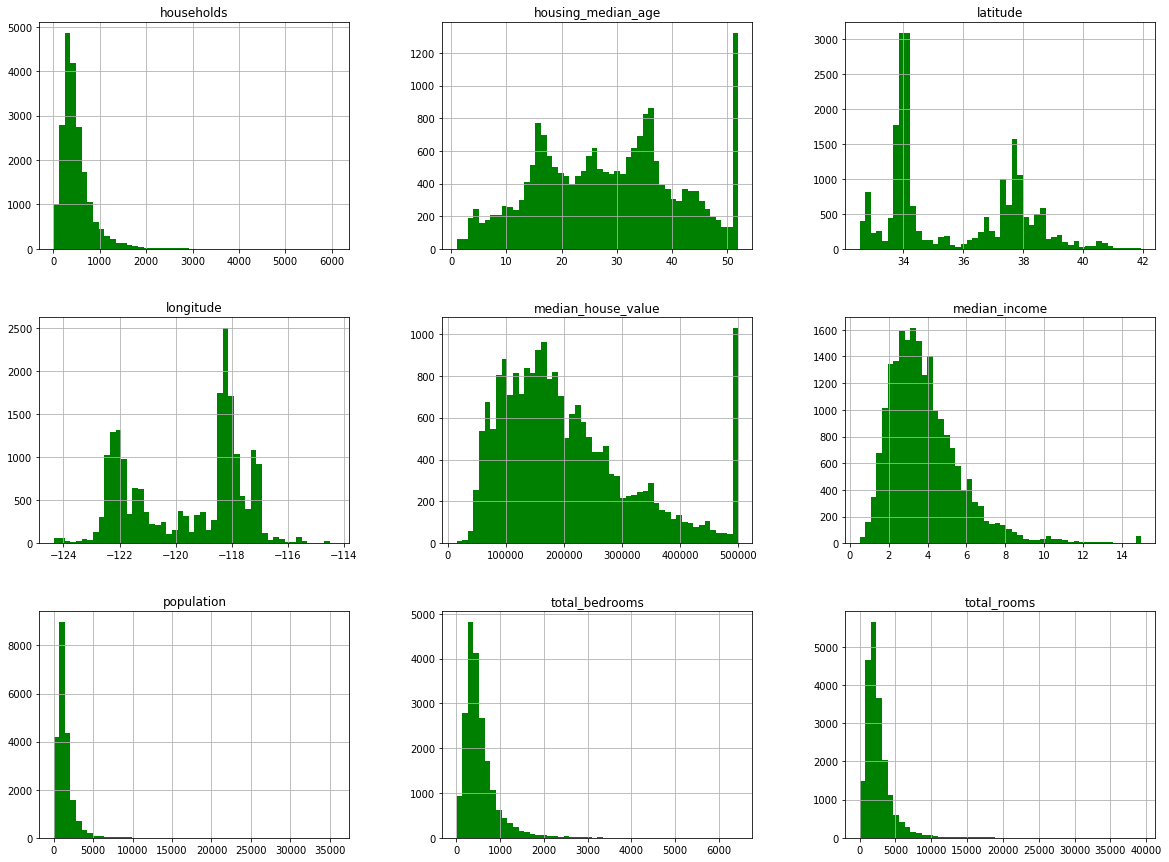

In [87]:
housing.hist(bins=50, figsize=(20,15), color="g")
plt.show()

Some things to note:
1. The <code>median_income</code> attribute is not expressed in USD. The data was scaled and capped at 15 for higher median incomes, and at 0.5 for lower. 
2. The <code>housing_median_age</code> and the <code>median_house_value</code> were also capped. This could be a problem because <code>median_house_value</code> is our target attribute/labels. The ML algorithm may learn that prices never go beyond this cap. Two options:
    - Collect proper labels for the capped districts.
    - Remove these districts from the training & test sets.
    
3. These attributes have different scales. Feature scaling coming soon.
4. Many of the histograms are tail heavy. Some ML algorithms may have trouble detecting patterns. We'll transform them to more bell-shaped distributions.

### 3. Create a test set

In [88]:
# Imports
import numpy as np

In [89]:
def split_train_test(data, test_ratio):
    
    '''
    This fx splits the dataset into a training and a test set depending 
    on the given ratio. The data points are randomly shuffled for random
    sampling.
    '''
    
    # Use seed to generate the same shuffled indices
    np.random.seed(42)
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [90]:
# Call fx: 20% is test set
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


The above approach works, but when we fetch updated datasets, it breaks. We want the test set to remain consistent across multiple runs, even if we refresh the dataset. So the new test set would contain 20% of the new instances, but not any of the instances that was in the previous training set. 

Possible solution: Use each instance's identifier (unique & immutable) to decide if it should go in the test set. For ex, compute a hash of each instance's identifier, keep only the last byte of the hash, and put the instance in the test set if the value is lower or equal to 51 (~20% of 256). 

A hash function is a function that takes input of a variable length sequence of bytes and converts it to a fixed length sequence.

Possible implementation:

In [91]:
import hashlib

In [92]:
def test_set_check(identifier, test_ratio, hash):
    '''
    This fx computes a hash of an identifier, keep only the last byte,
    and ask if it's less than (256 * test_ratio)
    '''
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [93]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    '''
    Apply the test_set_check fx to the data's identifier column
    '''
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

The housing dataset doesn't have an identifier column, so use row index as the ID:

In [94]:
housing_with_id = housing.reset_index() # add an "index" column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [95]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


With the above method, make sure that new data gets appended to the end of the dataset, and no row ever gets deleted. Otherwise, use other stable features to build a unique identifier. For ex, a district's latitude & longitude:

In [96]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [97]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


Splitting dataset with scikit-learn:

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

So far: Purely random sampling methods. This is fine if the dataset is large enough. But if not, we might introduce sampling bias. 

Suppose experts tell us that the median income is an important attribute in predicting median housing prices. We want the test set to be representative of the various income categories. Each stratum should be large enough, and don't have too many strata. Create an income category attribute by dividing the median income by 1.5 (to limit the number of categories), and round up to have discrete categories, and merge all categories greater than 5 into category 5:

In [100]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [101]:
housing["income_cat"].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

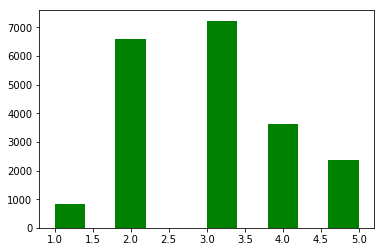

In [102]:
plt.hist(housing["income_cat"], color="green")
plt.show()

Stratified sampling based on the income category:

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

In [62]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [64]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

The test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, compared to the test set generated using random sampling. 

Remove the <code>income_cat</code> attribute so the data comes back to original state:

In [66]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Now put the test set aside for now.

## II. Discover & visualize data to gain insights

Make a copy of the training set to explore it.

In [70]:
housing = strat_train_set.copy()

### 1. Visualize geographical data

Scatterplot of all district to visualize the data. The <code>alpha</code> parameter distinguishes the areas with many data points: Bay Area, LA, SAn Diego...

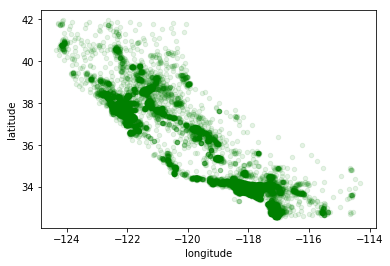

In [105]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, color="green")
plt.show()

Make radius of each circle (<code>s</code>) represent the district's population, and color (<code>cmap</code>) represent price. 

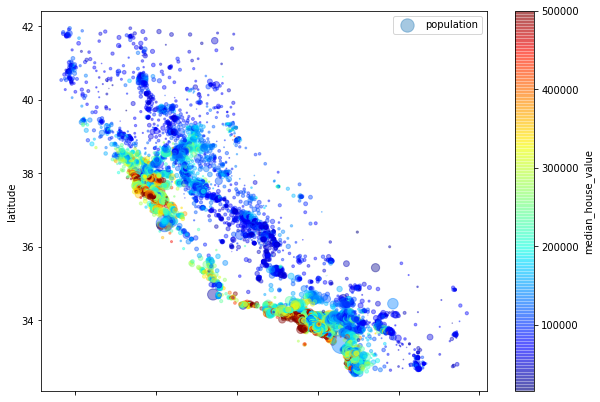

In [107]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

## III. Prepare data for ML algorithms

## IV. Select & train a model

## V. Fine tune model